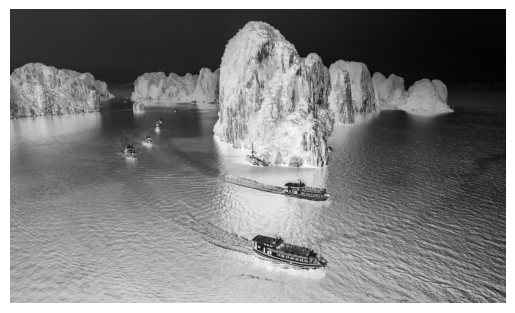

In [71]:
from PIL import Image
import numpy as np
import matplotlib.pylab as plt

# Open a grayscale image
img = Image.open('D:/anhkythuatso/lap2/exercise/quang_ninh.jpg').convert('L')

# Convert image into a NumPy array
im_l = np.asarray(img)

# Inversion operation (âm bản)
im_2 = 255 - im_l

# Convert inverted array back to image
new_img = Image.fromarray(im_2)

# Hiển thị ảnh gốc
img.show()

# Hiển thị ảnh âm bản bằng matplotlib
plt.imshow(new_img, cmap='gray')
plt.axis('off')
plt.show()



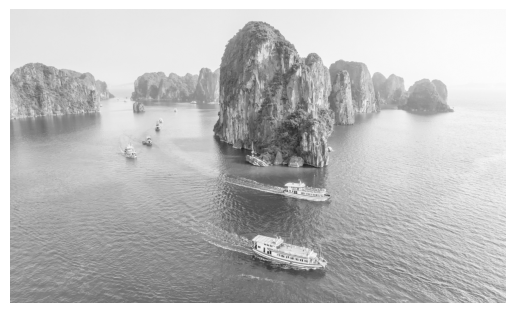

In [72]:
from PIL import Image
import numpy as np
import matplotlib.pylab as plt

# Mở ảnh grayscale
img = Image.open('D:/anhkythuatso/lap2/exercise/quang_ninh.jpg').convert('L')

# Chuyển ảnh thành mảng numpy
im_l = np.asarray(img)

# Khởi tạo gamma
gamma = 0.5

# Chuyển sang float để xử lý
b1 = im_l.astype(float)

# Tìm max để chuẩn hóa
b2 = np.max(b1)
b3 = b1 / b2

# Thêm epsilon để tránh log(0)
epsilon = 1e-8
b2 = np.log(b3 + epsilon) * gamma

# Gamma correction
c = np.exp(b2) * 255.0

# Chuyển về uint8 để dùng với PIL
c1 = c.astype(np.uint8)

# Tạo ảnh mới từ mảng đã xử lý
d = Image.fromarray(c1)

# Hiển thị ảnh
img.show()
d.show()

plt.imshow(d, cmap='gray')
plt.axis('off')
plt.show()


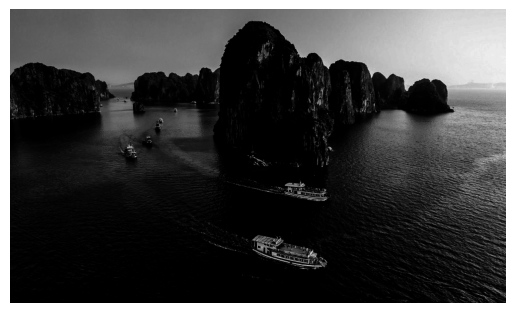

In [73]:
from PIL import Image
import numpy as np
import matplotlib.pylab as plt

# Mở ảnh grayscale
img = Image.open('D:/anhkythuatso/lap2/exercise/quang_ninh.jpg').convert('L')

# Chuyển ảnh thành mảng numpy
im_l = np.asarray(img)

# Khởi tạo gamma
gamma = 5

# Chuyển sang float để xử lý
b1 = im_l.astype(float)

# Tìm max để chuẩn hóa
b2 = np.max(b1)
b3 = b1 / b2

# Thêm epsilon để tránh log(0)
epsilon = 1e-8
b2 = np.log(b3 + epsilon) * gamma

# Gamma correction
c = np.exp(b2) * 255.0

# Chuyển về uint8 để dùng với PIL
c1 = c.astype(np.uint8)

# Tạo ảnh mới từ mảng đã xử lý
d = Image.fromarray(c1)

# Hiển thị ảnh
img.show()
d.show()

plt.imshow(d, cmap='gray')
plt.axis('off')
plt.show()

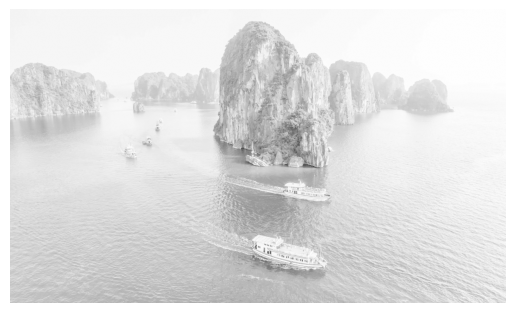

In [74]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Mở ảnh grayscale
img = Image.open('D:/anhkythuatso/lap2/exercise/quang_ninh.jpg').convert('L')

# Chuyển ảnh thành mảng numpy
im_l = np.asarray(img)

# Chuyển từ int sang float để xử lý log
b1 = im_l.astype(float)

# Tìm giá trị lớn nhất để chuẩn hóa
b2 = np.max(b1)

# Thực hiện biến đổi log
c = (128.0 * np.log(1 + b1)) / np.log(1 + b2)

# Chuyển về kiểu int (nên dùng uint8 để tránh lỗi)
c1 = c.astype(np.uint8)

# Tạo ảnh mới từ mảng đã xử lý
d = Image.fromarray(c1)

# Hiển thị ảnh gốc và ảnh sau khi biến đổi
img.show()
d.show()

# Hoặc hiển thị bằng matplotlib
plt.imshow(d, cmap='gray')
plt.axis('off')
plt.show()


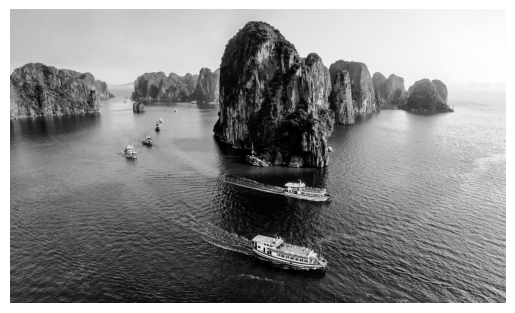

In [75]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Mở ảnh grayscale
img = Image.open('D:/anhkythuatso/lap2/exercise/quang_ninh.jpg').convert('L')

# Chuyển ảnh thành mảng numpy
im1 = np.asarray(img)

# Chuyển mảng 2D thành 1D để dễ xử lý
b1 = im1.flatten()

# Tính histogram và các bin (0-255)
hist, bins = np.histogram(im1, 256, [0, 255])

# Tính hàm phân phối tích lũy (CDF)
cdf = hist.cumsum()

# Ẩn (mask) các phần tử bằng 0 để tránh chia cho 0
cdf_m = np.ma.masked_equal(cdf, 0)

# Áp dụng công thức cân bằng histogram
num_cdf_m = (cdf_m - cdf_m.min()) * 255
den_cdf_m = (cdf_m.max() - cdf_m.min())
cdf_m = num_cdf_m / den_cdf_m

# Thay thế các vị trí bị mask bằng 0 và đổi sang kiểu uint8
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

# Ánh xạ giá trị từ ảnh gốc sang giá trị cân bằng
im2 = cdf[b1]

# Reshape mảng 1D thành ảnh 2D
im3 = np.reshape(im2, im1.shape)

# Tạo ảnh mới từ mảng đã xử lý
im4 = Image.fromarray(im3)

# Hiển thị ảnh gốc và ảnh sau xử lý
img.show()
im4.show()

# Hoặc dùng matplotlib
plt.imshow(im4, cmap='gray')
plt.axis('off')
plt.show()


0 254


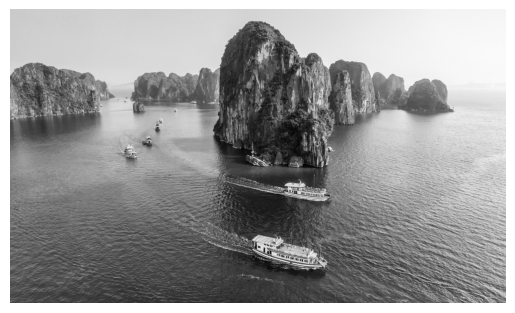

In [76]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Mở ảnh grayscale
img = Image.open('D:/anhkythuatso/lap2/exercise/quang_ninh.jpg').convert('L')

# Chuyển ảnh sang ndarray
im1 = np.asarray(img)

# Tìm giá trị pixel nhỏ nhất và lớn nhất
b = im1.max()
a = im1.min()
print(a, b)

# Chuyển kiểu dữ liệu sang float để xử lý chính xác hơn
c = im1.astype(float)

# Áp dụng công thức contrast stretching
im2 = 255 * (c - a) / (b - a)

# Đảm bảo kết quả là kiểu uint8
im2 = np.clip(im2, 0, 255).astype('uint8')

# Tạo ảnh mới từ mảng kết quả
im3 = Image.fromarray(im2)

# Hiển thị ảnh
img.show()      # ảnh gốc
im3.show()      # ảnh đã xử lý
plt.imshow(im3, cmap='gray')
plt.axis('off')
plt.show()


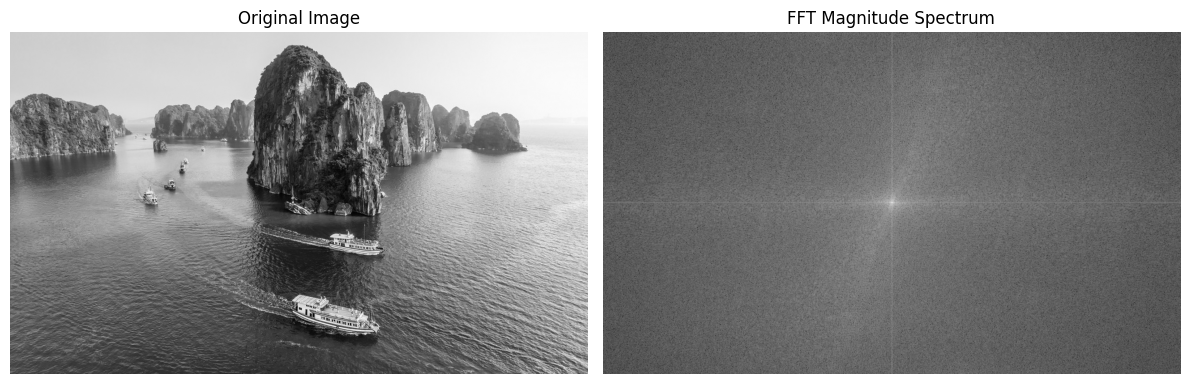

In [77]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Mở ảnh grayscale
img = Image.open('D:/anhkythuatso/lap2/exercise/quang_ninh.jpg').convert('L')

# Chuyển ảnh sang ndarray
im1 = np.asarray(img)

# Thực hiện biến đổi Fourier (FFT)
c = abs(scipy.fftpack.fft2(im1))

# Dịch tâm phổ tần số về giữa ảnh
d = scipy.fftpack.fftshift(c)

# Chuyển đổi sang float (chuẩn bị hiển thị)
d = d.astype(float)

# Hiển thị ảnh gốc và ảnh phổ tần số
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("FFT Magnitude Spectrum")
plt.imshow(np.log(1 + d), cmap='gray')  # dùng log để dễ nhìn phổ
plt.axis('off')

plt.tight_layout()
plt.show()



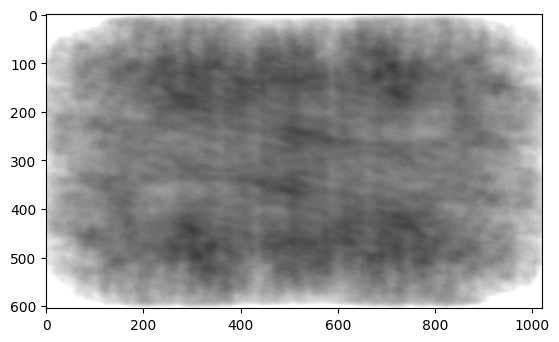

In [78]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Open a grayscale image
img = Image.open('D:/anhkythuatso/lap2/exercise/quang_ninh.jpg').convert('L')

# Convert image into an ndarray
im1 = np.asarray(img)

# Performing FFT
c = abs(scipy.fftpack.fft2(im1))

# Shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)

# Initializing variables for convolution function
M = d.shape[0]
N = d.shape[1]

# H is defined and values in H are initialized to 1
H = np.ones((M, N))

center1 = M / 2
center2 = N / 2
d_0 = 30.0  # cut-off radius
t1 = 1      # the order of BLPF (Butterworth Lowpass Filter)
t2 = 2 * t1

# Defining the convolution function for BLPF
for i in range(1, M):
    for j in range(1, N):
        r1 = (i - center1)**2 + (j - center2)**2
        # Euclidean distance from origin is computed
        r = math.sqrt(r1)
        # Using cut-off radius to eliminate high frequency
        if r > d_0:
            H[i, j] = 1 / (1 + (r / d_0)**t1)

# H is converted from ndarray to image
H = H.astype(float)
H = Image.fromarray(H)

# Performing the convolution
con = d * H

# Computing the magnitude of the inverse FFT
e = abs(scipy.fftpack.ifft2(con))

# H is converted from ndarray to image
e = e.astype(float)
im3 = Image.fromarray(e)

img.show()
im3.show()
plt.imshow(im3)
plt.show()


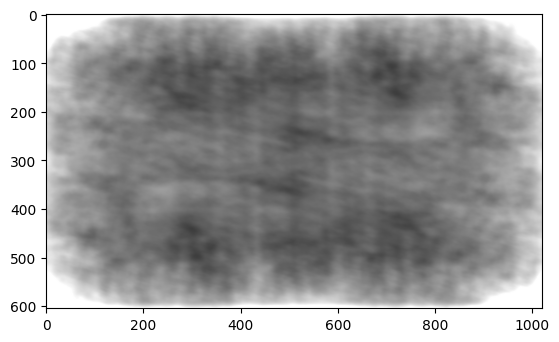

In [79]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# Open a grayscale image
img = Image.open('D:/anhkythuatso/lap2/exercise/quang_ninh.jpg').convert('L')

# Convert image into an ndarray
im1 = np.asarray(img)

# Performing FFT
c = abs(scipy.fftpack.fft2(im1))

# Shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)

# Initializing variables for convolution function
M = d.shape[0]
N = d.shape[1]

# H is defined and values in H are initialized to 1
H = np.ones((M, N))

center1 = M / 2
center2 = N / 2
d_0 = 30.0  # cut-off radius
t1 = 1      # the order of BLPF (Butterworth Lowpass Filter)
t2 = 2 * t1

# Defining the convolution function for BLPF
for i in range(1, M):
    for j in range(1, N):
        r1 = (i - center1)**2 + (j - center2)**2
        # Euclidean distance from origin is computed
        r = math.sqrt(r1)
        # Using cut-off radius to eliminate high frequency
        if r > d_0:
            H[i, j] = 1 / (1 + (r / d_0)**t2)

# H is converted from ndarray to image (convert to float first)
H = H.astype(float)

# Performing the convolution
con = d * H

# Computing the magnitude of the inverse FFT
e = abs(scipy.fftpack.ifft2(con))

# e is converted from ndarray to image
e = e.astype(float)
im3 = Image.fromarray(e)

img.show()
im3.show()
plt.imshow(im3)
plt.show()


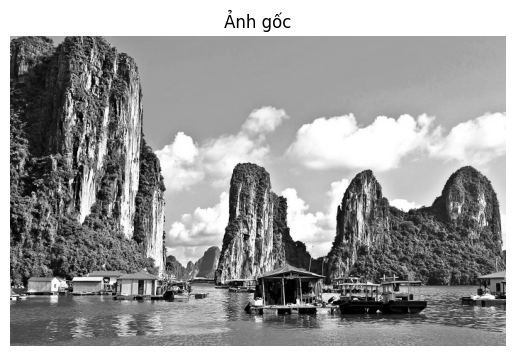

Dropdown(description='Chọn xử lý:', layout=Layout(width='50%'), options={'Image inverse transformation': 'I', …

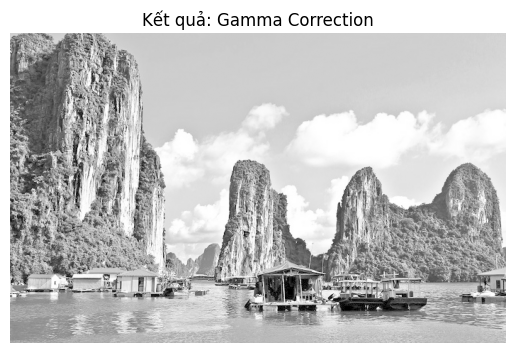

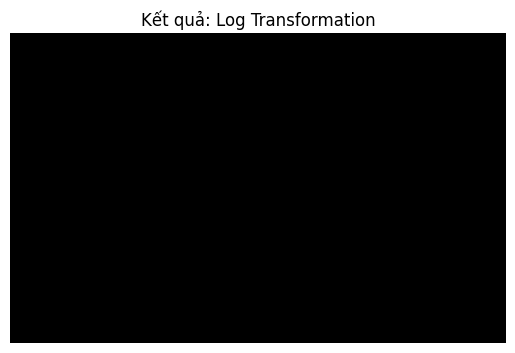

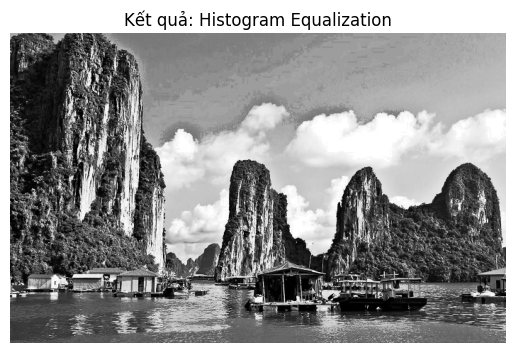

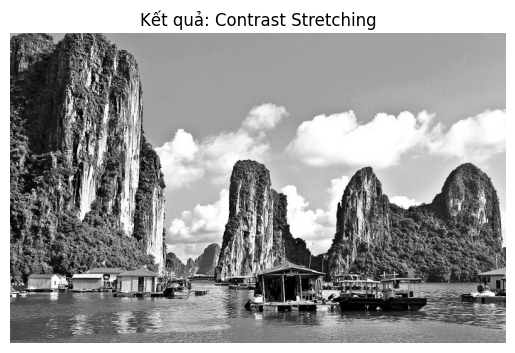

In [89]:
#bai1
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
#pip install ipywidgets

# Các hàm xử lý ảnh:

def inverse_transform(img):
    return 255 - img

def gamma_correction(img, gamma=2.2):
    invGamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** invGamma * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(img, table)

def log_transform(img):
    c = 255 / np.log(1 + np.max(img))
    log_image = c * (np.log(1 + img))
    return np.array(log_image, dtype=np.uint8)

def histogram_equalization(img):
    return cv2.equalizeHist(img)

def contrast_stretching(img):
    a = np.min(img)
    b = np.max(img)
    stretched = ((img - a) / (b - a)) * 255
    return np.array(stretched, dtype=np.uint8)

# Đọc ảnh gốc (bạn thay lại đường dẫn ảnh của mình)
filename = r'D:\anhkythuatso\lap2\exercise\ha-long-bay-in-vietnam.jpg'
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)


# Hiển thị ảnh gốc
plt.imshow(img, cmap='gray')
plt.title("Ảnh gốc")
plt.axis('off')
plt.show()

# Tạo dropdown menu:
options = {
    'Image inverse transformation': 'I',
    'Gamma Correction': 'G',
    'Log Transformation': 'L',
    'Histogram Equalization': 'H',
    'Contrast Stretching': 'C'
}

dropdown = widgets.Dropdown(
    options=options,
    description='Chọn xử lý:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Hàm xử lý khi chọn menu:
def process(change):
    key = dropdown.value

    if key == 'I':
        result = inverse_transform(img)
    elif key == 'G':
        result = gamma_correction(img)
    elif key == 'L':
        result = log_transform(img)
    elif key == 'H':
        result = histogram_equalization(img)
    elif key == 'C':
        result = contrast_stretching(img)
    else:
        result = img

    plt.imshow(result, cmap='gray')
    plt.title(f"Kết quả: {dropdown.label}")
    plt.axis('off')
    plt.show()

# Hiển thị dropdown và xử lý:
display(dropdown)
dropdown.observe(process, names='value')


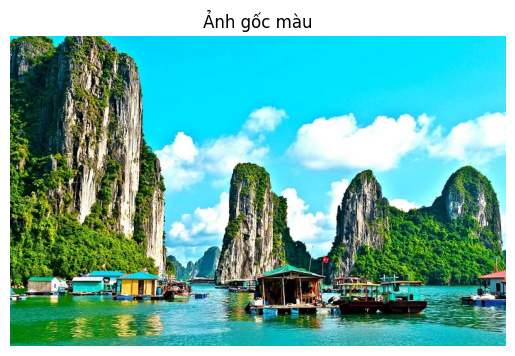

Dropdown(description='Chọn xử lý:', layout=Layout(width='50%'), options={'Image inverse transformation': 'I', …

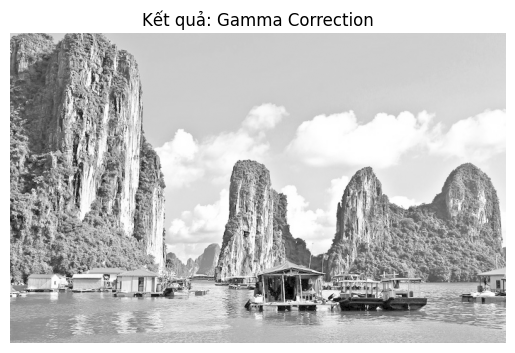

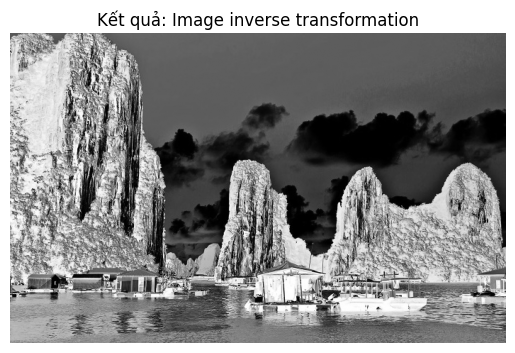

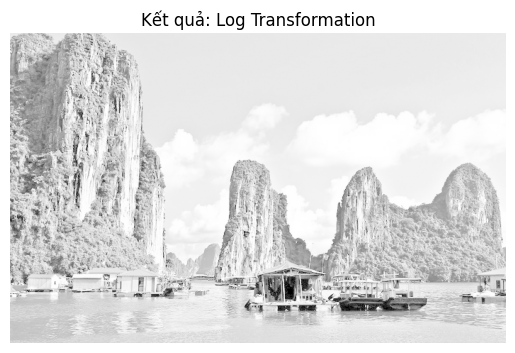

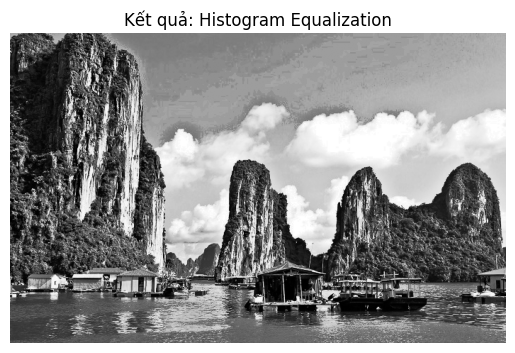

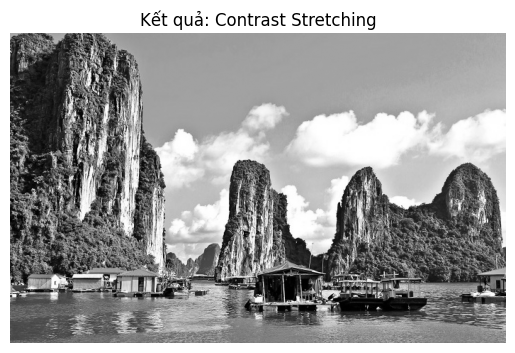

In [ ]:
# bai1
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Các hàm xử lý ảnh:

def inverse_transform(img):
    return 255 - img

def gamma_correction(img, gamma=2.2):
    invGamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** invGamma * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(img, table)

def log_transform(img):
    img_float = img.astype(np.float32)
    c = 255 / np.log(1 + np.max(img_float))
    log_image = c * np.log(1 + img_float)
    log_image = np.clip(log_image, 0, 255)
    return log_image.astype(np.uint8)

def histogram_equalization(img):
    return cv2.equalizeHist(img)

def contrast_stretching(img):
    a = np.min(img)
    b = np.max(img)
    stretched = ((img - a) / (b - a)) * 255
    return stretched.astype(np.uint8)

# Đọc ảnh gốc (bạn thay lại đường dẫn ảnh của mình)
filename = r'D:\anhkythuatso\lap2\exercise\ha-long-bay-in-vietnam.jpg'
img_color = cv2.imread(filename)
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# Hiển thị ảnh gốc
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.title("Ảnh gốc màu")
plt.axis('off')
plt.show()

# Tạo dropdown menu:
options = {
    'Image inverse transformation': 'I',
    'Gamma Correction': 'G',
    'Log Transformation': 'L',
    'Histogram Equalization': 'H',
    'Contrast Stretching': 'C'
}

dropdown = widgets.Dropdown(
    options=options,
    description='Chọn xử lý:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Hàm xử lý khi chọn menu:
def process(change):
    key = dropdown.value

    if key == 'I':
        result = inverse_transform(img_gray)
    elif key == 'G':
        result = gamma_correction(img_gray)
    elif key == 'L':
        result = log_transform(img_gray)
    elif key == 'H':
        result = histogram_equalization(img_gray)
    elif key == 'C':
        result = contrast_stretching(img_gray)
    else:
        result = img_gray

    plt.imshow(result, cmap='gray')
    plt.title(f"Kết quả: {dropdown.label}")
    plt.axis('off')
    plt.show()

# Hiển thị dropdown và xử lý:
display(dropdown)
dropdown.observe(process, names='value')


Dropdown(description='Chọn phép biến đổi:', layout=Layout(width='50%'), options=('Fast Fourier', 'Butterworth …

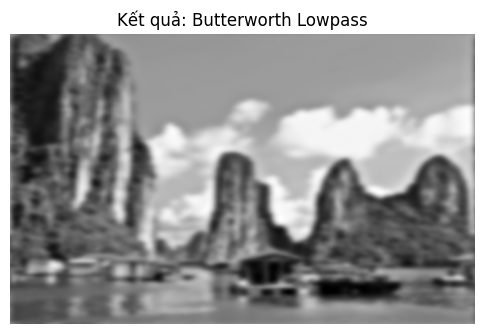

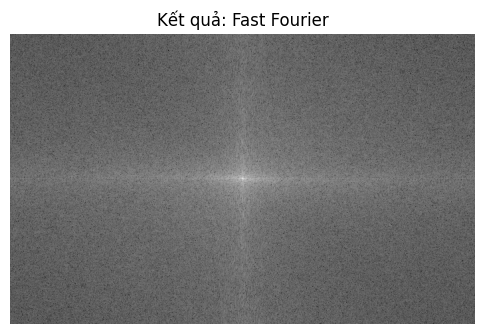

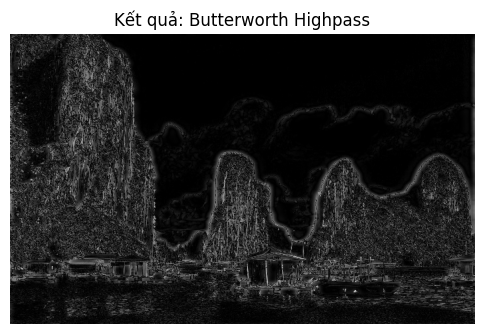

In [91]:
# bai2
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import ipywidgets as widgets
from IPython.display import display

# Đọc ảnh từ thư mục exercise
folder = 'exercise'
filename = os.path.join(folder, 'ha-long-bay-in-vietnam.jpg')  # Đổi lại tên file của bạn
img = cv2.imread(filename, 0)

# Hàm xử lý
def fast_fourier(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
    return magnitude_spectrum

def butterworth_lowpass_filter(image, D0=30, n=2):
    rows, cols = image.shape
    crow, ccol = rows//2, cols//2
    u = np.arange(rows)
    v = np.arange(cols)
    V, U = np.meshgrid(v, u)
    D = np.sqrt((U - crow)**2 + (V - ccol)**2)
    H = 1 / (1 + (D/D0)**(2*n))
    F = np.fft.fft2(image)
    Fshift = np.fft.fftshift(F)
    G = H * Fshift
    G_ishift = np.fft.ifftshift(G)
    img_back = np.fft.ifft2(G_ishift)
    img_back = np.abs(img_back)
    return img_back

def butterworth_highpass_filter(image, D0=30, n=2):
    rows, cols = image.shape
    crow, ccol = rows//2, cols//2
    u = np.arange(rows)
    v = np.arange(cols)
    V, U = np.meshgrid(v, u)
    D = np.sqrt((U - crow)**2 + (V - ccol)**2)
    H = 1 / (1 + (D0 / (D + 1e-5))**(2*n))
    F = np.fft.fft2(image)
    Fshift = np.fft.fftshift(F)
    G = H * Fshift
    G_ishift = np.fft.ifftshift(G)
    img_back = np.fft.ifft2(G_ishift)
    img_back = np.abs(img_back)
    return img_back

# Tạo dropdown menu
options = ['Fast Fourier', 'Butterworth Lowpass', 'Butterworth Highpass']
dropdown = widgets.Dropdown(
    options=options,
    value='Fast Fourier',
    description='Chọn phép biến đổi:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Hàm xử lý khi chọn từ dropdown
def on_select(change):
    choice = change['new']
    
    if choice == 'Fast Fourier':
        result = fast_fourier(img)
        cv2.imwrite(os.path.join(folder, 'fourier.jpg'), result)
    elif choice == 'Butterworth Lowpass':
        result = butterworth_lowpass_filter(img)
        cv2.imwrite(os.path.join(folder, 'lowpass.jpg'), result)
    elif choice == 'Butterworth Highpass':
        result = butterworth_highpass_filter(img)
        cv2.imwrite(os.path.join(folder, 'highpass.jpg'), result)
    
    plt.figure(figsize=(6,6))
    plt.imshow(result, cmap='gray')
    plt.title(f"Kết quả: {choice}")
    plt.axis('off')
    plt.show()

# Liên kết dropdown với hàm xử lý
dropdown.observe(on_select, names='value')
display(dropdown)


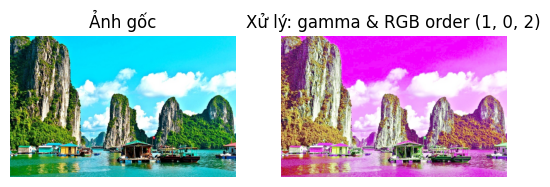

In [92]:
#bai3
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os

# Thư mục ảnh (bạn điều chỉnh lại đúng với máy bạn)
filename = r'D:\anhkythuatso\lap2\exercise\ha-long-bay-in-vietnam.jpg'
folder_output = r'D:\anhkythuatso\lap2\exercise\output'
os.makedirs(folder_output, exist_ok=True)

# Đọc ảnh màu
img_color = cv2.imread(filename)
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)  # Chuyển sang RGB

# Danh sách các hàm xử lý:
def inverse_transform(img):
    return 255 - img

def gamma_correction(img, gamma=2.2):
    invGamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** invGamma * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(img, table)

def log_transform(img):
    img_float = img.astype(np.float32)
    c = 255 / np.log(1 + np.max(img_float))
    log_image = c * np.log(1 + img_float)
    log_image = np.clip(log_image, 0, 255)
    return log_image.astype(np.uint8)

def histogram_equalization(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

def contrast_stretching(img):
    a = np.min(img)
    b = np.max(img)
    stretched = ((img - a) / (b - a)) * 255
    return stretched.astype(np.uint8)

# Danh sách thứ tự màu có thể đổi
color_permutations = [
    (0, 1, 2),
    (0, 2, 1),
    (1, 0, 2),
    (1, 2, 0),
    (2, 0, 1),
    (2, 1, 0)
]

# Danh sách các hàm xử lý và tên
processing_functions = [
    (inverse_transform, 'inverse'),
    (gamma_correction, 'gamma'),
    (log_transform, 'log'),
    (histogram_equalization, 'hist_eq'),
    (contrast_stretching, 'contrast')
]

# Chọn ngẫu nhiên thứ tự màu
perm = random.choice(color_permutations)
img_reordered = img_color[:,:,perm]

# Chọn ngẫu nhiên phép xử lý
func, func_name = random.choice(processing_functions)

# Áp dụng xử lý trên từng kênh màu
channels = cv2.split(img_reordered)
processed_channels = [func(c) for c in channels]
result = cv2.merge(processed_channels)

# Hiển thị kết quả
plt.subplot(1,2,1)
plt.imshow(img_color)
plt.title("Ảnh gốc")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(result)
plt.title(f'Xử lý: {func_name} & RGB order {perm}')
plt.axis('off')
plt.show()



Xử lý file: fourier.jpg


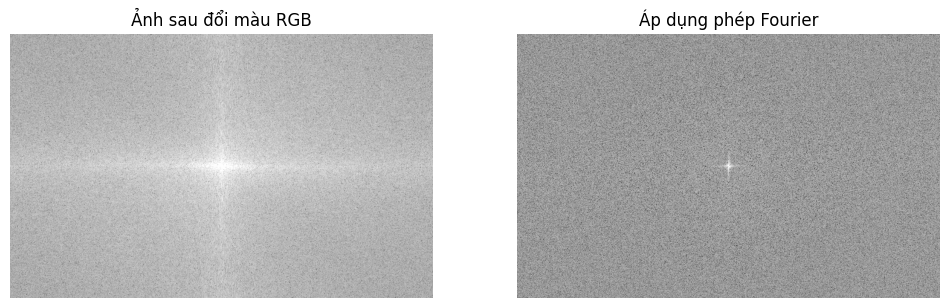

Xử lý file: ha-long-bay-in-vietnam.jpg


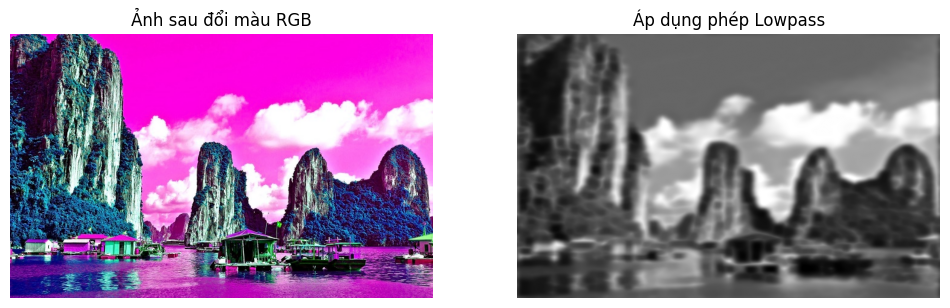

Xử lý file: highpass.jpg


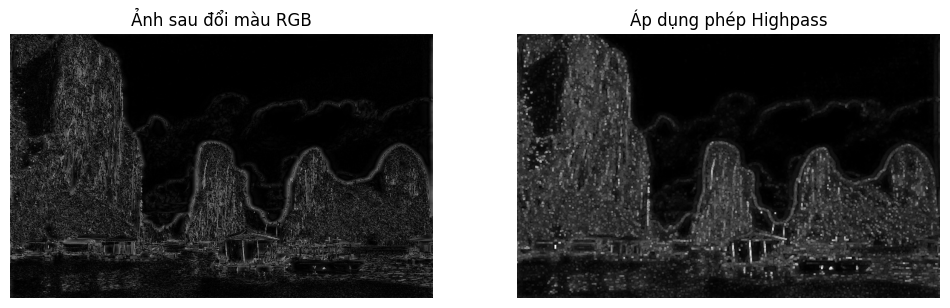

Xử lý file: lowpass.jpg


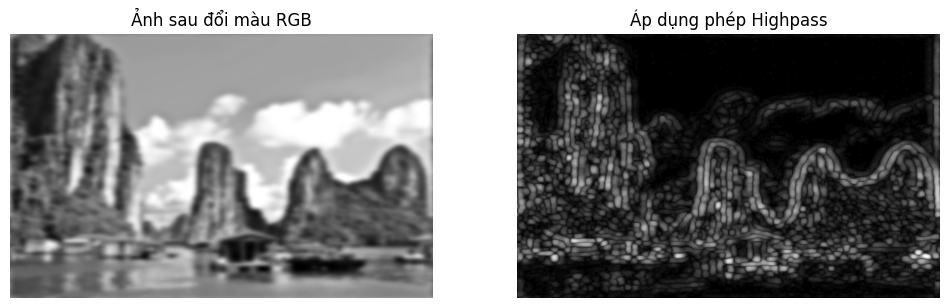

Xử lý file: pagoda.jpg


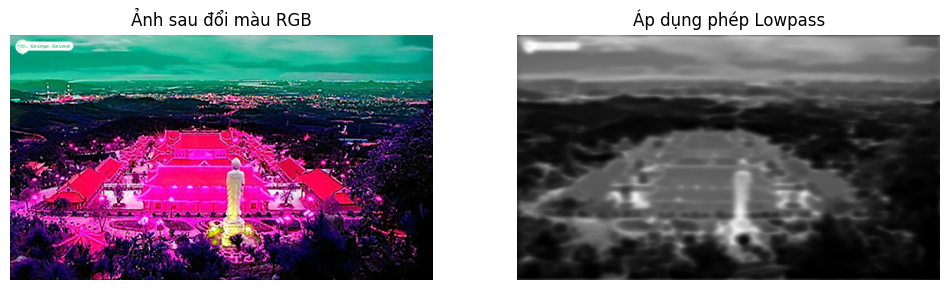

Xử lý file: quang_ninh.jpg


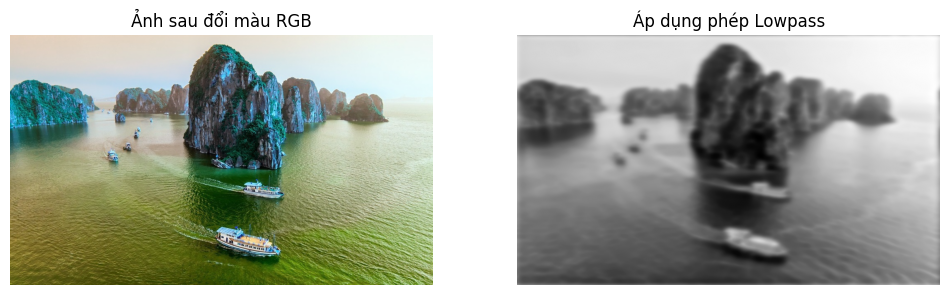

In [93]:
#bai4 
#Chọn ngẫu nhiên 1 phép biến đổi:

#Fast Fourier

#Butterworth Lowpass (+ thêm Min filter nếu chọn Lowpass)

#Butterworth Highpass (+ thêm Max filter nếu chọn Highpass)

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from scipy.ndimage import minimum_filter, maximum_filter

# Thư mục chứa ảnh
folder = 'exercise'
file_list = [f for f in os.listdir(folder) if f.endswith(('.jpg', '.png'))]

# Duyệt qua từng file trong thư mục
for filename in file_list:
    print(f"Xử lý file: {filename}")
    filepath = os.path.join(folder, filename)

    # Đọc ảnh màu
    img_color = cv2.imread(filepath)
    img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

    # Thay đổi thứ tự màu RGB ngẫu nhiên
    channels = [0, 1, 2]
    random.shuffle(channels)
    img_reordered = img_color[:, :, channels]

    # Chọn ngẫu nhiên phép biến đổi
    methods = ['Fourier', 'Lowpass', 'Highpass']
    method = random.choice(methods)

    # Chuyển về ảnh xám để xử lý Fourier và Butterworth
    img_gray = cv2.cvtColor(img_reordered, cv2.COLOR_RGB2GRAY)

    if method == 'Fourier':
        # Fast Fourier
        f = np.fft.fft2(img_gray)
        fshift = np.fft.fftshift(f)
        magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
        result = np.clip(magnitude_spectrum, 0, 255).astype(np.uint8)

    elif method == 'Lowpass':
        # Butterworth Lowpass
        rows, cols = img_gray.shape
        crow, ccol = rows//2, cols//2
        u = np.arange(rows)
        v = np.arange(cols)
        V, U = np.meshgrid(v, u)
        D = np.sqrt((U - crow)**2 + (V - ccol)**2)
        D0 = 30
        n_order = 2
        H = 1 / (1 + (D/D0)**(2*n_order))
        F = np.fft.fft2(img_gray)
        Fshift = np.fft.fftshift(F)
        G = H * Fshift
        G_ishift = np.fft.ifftshift(G)
        img_back = np.fft.ifft2(G_ishift)
        img_back = np.abs(img_back)
        img_back = np.clip(img_back, 0, 255).astype(np.uint8)

        # Thêm min filter nếu là Lowpass
        result = minimum_filter(img_back, size=3)

    elif method == 'Highpass':
        # Butterworth Highpass
        rows, cols = img_gray.shape
        crow, ccol = rows//2, cols//2
        u = np.arange(rows)
        v = np.arange(cols)
        V, U = np.meshgrid(v, u)
        D = np.sqrt((U - crow)**2 + (V - ccol)**2)
        D0 = 30
        n_order = 2
        H = 1 / (1 + (D0 / (D + 1e-5))**(2*n_order))
        F = np.fft.fft2(img_gray)
        Fshift = np.fft.fftshift(F)
        G = H * Fshift
        G_ishift = np.fft.ifftshift(G)
        img_back = np.fft.ifft2(G_ishift)
        img_back = np.abs(img_back)
        img_back = np.clip(img_back, 0, 255).astype(np.uint8)

        # Thêm max filter nếu là Highpass
        result = maximum_filter(img_back, size=3)

    # Hiển thị ảnh kết quả
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_reordered)
    plt.title("Ảnh sau đổi màu RGB")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(result, cmap='gray')
    plt.title(f"Áp dụng phép {method}")
    plt.axis('off')
    plt.show()



